# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:48<00:00, 2269.98it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]
# replacing essay data with cleaned and preprocessed data
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
def preprocess_text_func(text_data):
    sent = decontracted(text_data)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    return sent.lower()

In [19]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    preprocessed_titles.append(preprocess_text_func(sentance))
project_data['project_title']=preprocessed_titles

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 48383.79it/s]


## 1.5 Preparing data for models

In [20]:
# dropping unwanted columns such as Unnamed
project_data.drop(['Unnamed: 0'], axis=1, inplace=True)
project_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [22]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [23]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
def perform_one_hot_encoding(listdata, category,fillnan_value=""):
    vectorizer =  CountVectorizer(vocabulary=listdata, lowercase=False, binary=True)
    vectorizer.fit(project_data[category].fillna(fillnan_value).values)
    print(vectorizer.get_feature_names())
    print("="*50)
    return vectorizer.transform(project_data[category].fillna(fillnan_value).values)

In [24]:
# One hot encoding for school state
countries_list = sorted(project_data["school_state"].value_counts().keys())
school_state_one_hot = perform_one_hot_encoding(countries_list, "school_state")
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (109248, 51)


In [25]:
# Project_Grade_Category - replacing hyphens, spaces with Underscores
project_data['project_grade_category'] = project_data['project_grade_category'].map({'Grades PreK-2': 'Grades_PreK_2',
                                                                                     'Grades 6-8' : 'Grades_6_8',
                                                                                     'Grades 3-5' : 'Grades_3_5',
                                                                                     'Grades 9-12' : 'Grades_9_12'})
project_data['teacher_prefix'] = project_data['teacher_prefix'].map({'Mrs.': 'Mrs', 'Ms.': 'Ms', 'Mr.' : 'Mr', 
                                                                     'Teacher': 'Teacher', 'Dr.' : 'Dr'})

In [26]:
# Replacing Null values with most repititive values
project_data["teacher_prefix"].fillna("Mrs", inplace=True)
# One hot encoding for teacher_prefix
teacher_prefix_list = sorted(project_data["teacher_prefix"].value_counts().keys())
print (teacher_prefix_list)
teacher_prefix_one_hot = perform_one_hot_encoding(teacher_prefix_list, "teacher_prefix", "Mrs.")
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (109248, 5)


In [27]:
# One hot encoding for project_grade_category
grade_list = sorted(project_data["project_grade_category"].value_counts().keys())
grade_one_hot = perform_one_hot_encoding(grade_list, "project_grade_category")
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of matrix after one hot encodig  (109248, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [28]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [29]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_titles = CountVectorizer(min_df=10)
text_bow_titles = vectorizer_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_bow_titles.shape)
bow_titles_feature_names = vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.5.2.2 TFIDF vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [31]:
# TFIDF  Vectorizer for Preprocessed Title
vectorizer_titles = TfidfVectorizer(min_df=10)
text_tfidf_titles = vectorizer_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_tfidf_titles.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [32]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [33]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:26<00:00, 4117.90it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [35]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [36]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:06<00:00, 586.30it/s]


109248
300


In [37]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [38]:
tfidf_w2v_vectors_titles = []; # the avg-w2v for each project_title is stored in this list
for sentence in tqdm(preprocessed_titles): # for each project_title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 38381.31it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [39]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [41]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [42]:
# Vectorizing teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [43]:
# Categorical
print(school_state_one_hot.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(grade_one_hot.shape)
print(text_bow_titles.shape)
print(text_bow.shape)
# Numerical
print(price_standardized.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)

(109248, 51)
(109248, 9)
(109248, 30)
(109248, 5)
(109248, 4)
(109248, 3329)
(109248, 16623)
(109248, 1)
(109248, 1)


In [44]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot,
            grade_one_hot, text_bow_titles, text_bow, price_standardized, 
            teacher_number_of_previously_posted_projects_standardized))
X.shape

(109248, 20053)

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [46]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# Seperating Labels from Project_Data dataframe
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs           IN   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades_PreK_2   

                               project_title  \
0  educational support english learners home   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  my students english learners working english s...   

   price  quantity  
0  154.6        23

In [48]:
# Train Test Stratified Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(49041, 14) (49041,)
(24155, 14) (24155,)
(36052, 14) (36052,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [49]:
# Encoding School State - OHE
# School State
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [50]:
# Encoding Teacher Prefix OHE
# teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [51]:
# Encoding project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [52]:
# Encoding Categories
# clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
print(X_cv_category_ohe.shape, y_cv.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [53]:
# Encoding sub categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_cv_subcategory_ohe.shape, y_cv.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


Encoding Numerical features

In [54]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [55]:
# teacher previously posted projects
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teach_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teach_prev_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teach_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teach_prev_norm = X_train_teach_prev_norm.reshape(-1,1)
X_cv_teach_prev_norm = X_cv_teach_prev_norm.reshape(-1,1)
X_test_teach_prev_norm = X_test_teach_prev_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_teach_prev_norm.shape, y_train.shape)
print(X_cv_teach_prev_norm.shape, y_cv.shape)
print(X_test_teach_prev_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [56]:
vectorizer = CountVectorizer(min_df=10, ngram_range=(2,2), max_features=5000) # Just bigrams for Essay
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=10,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [58]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [59]:
# Preprocessing project_title
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_pj_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_pj_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_pj_title_bow = vectorizer.transform(X_test['project_title'].values)
print("After vectorizations")
print(X_train_pj_title_bow.shape, y_train.shape)
print(X_cv_pj_title_bow.shape, y_cv.shape)
print(X_test_pj_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 11565) (49041,)
(24155, 11565) (24155,)
(36052, 11565) (36052,)


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

Set 1 BOW

In [61]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_price_norm, X_train_category_ohe,
               X_train_subcategory_ohe, X_train_teach_prev_norm, 
               X_train_pj_title_bow)).tocsr()

X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, 
               X_cv_grade_ohe, X_cv_category_ohe, X_cv_subcategory_ohe,
               X_cv_price_norm, X_cv_teach_prev_norm, X_cv_pj_title_bow)).tocsr()

X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, 
               X_test_grade_ohe, X_test_category_ohe, X_test_subcategory_ohe, 
               X_test_price_norm, X_test_teach_prev_norm,
               X_test_pj_title_bow)).tocsr()

In [62]:
print("Final Data matrix - for set 1")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 1
(49041, 16666) (49041,)
(24155, 16666) (24155,)
(36052, 16666) (36052,)


In [63]:
# Necessary Package imports
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

### Important Note: predict_proba is written for log loss and modified huber loss and not for hinge loss

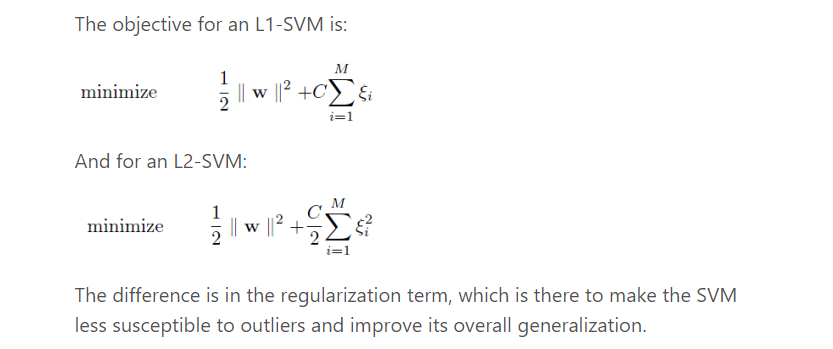

In [64]:
# SVM With L2 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
    svm_output_bow.fit(X_tr, y_train)

    y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_bow.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.46it/s]


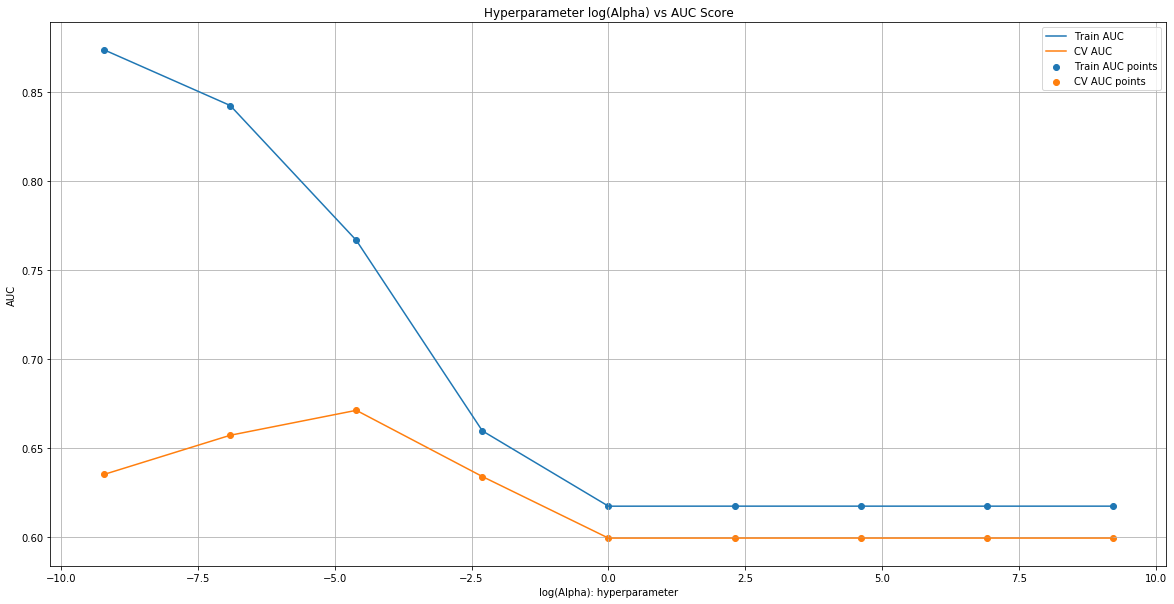

In [65]:
# Since plotting the alphas values directly doesn't yield good graph
# lets convert them to their log values and then plot it
from math import log
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid()
plt.show()

In [66]:
# best alpha appears to be at third point
best_alpha = 10**-2

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

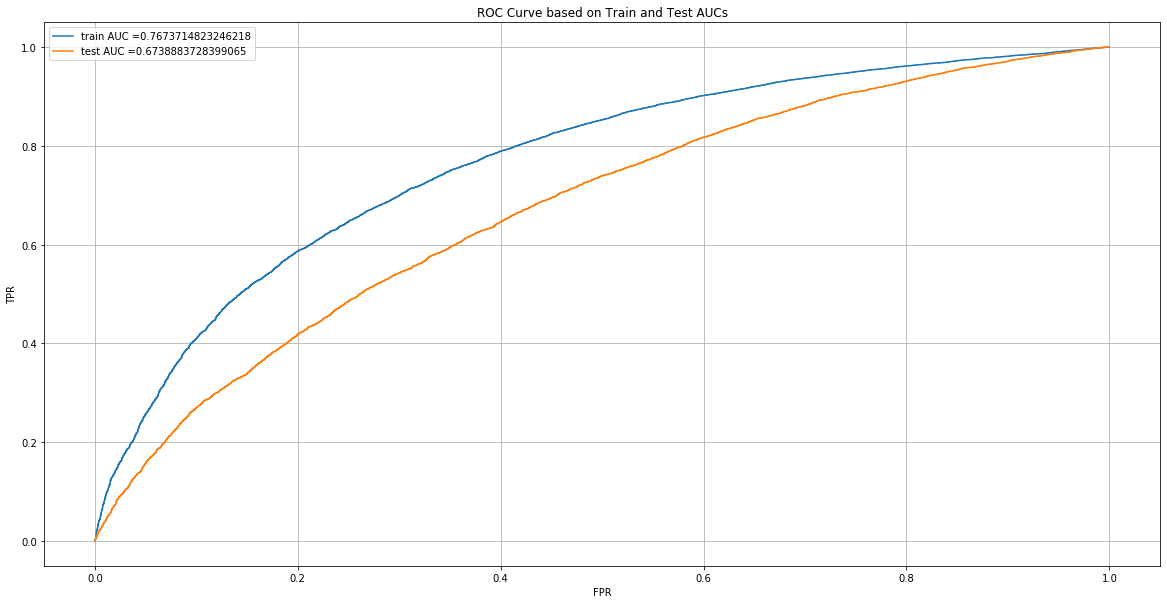

In [67]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [68]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [69]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.49149955596631606 for threshold 0.83
Train confusion matrix
[[ 5144  2318]
 [11934 29645]]
Test confusion matrix
[[ 2724  2735]
 [ 7965 22628]]


Text(0.5, 1, 'Training Confusion Matrix')

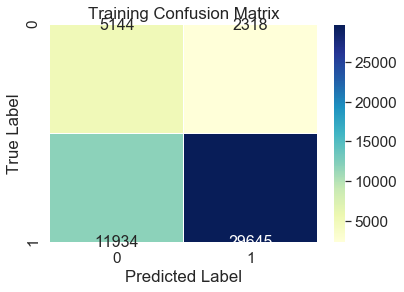

In [70]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

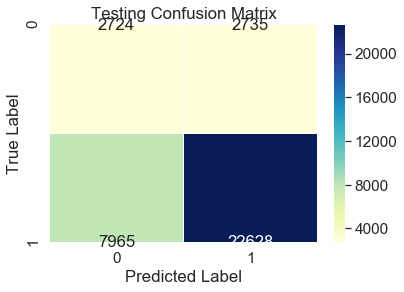

In [71]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

Set -1 BOW with L1 Penality

In [72]:
# SVM With L2 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
    svm_output_bow.fit(X_tr, y_train)

    y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_bow.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:47<00:00,  5.26s/it]


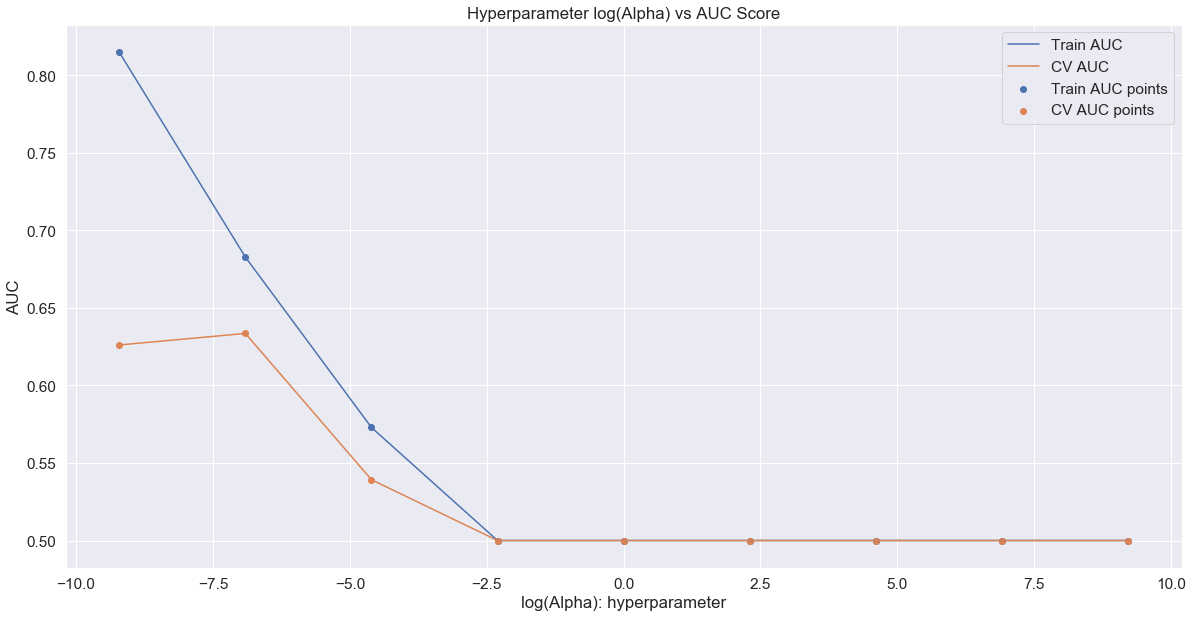

In [73]:
# Since plotting the alphas values directly doesn't yield good graph
# lets convert them to their log values and then plot it
from math import log
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True)
plt.show()

In [74]:
# best alpha appears to be at second point
best_alpha = 10**-3

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

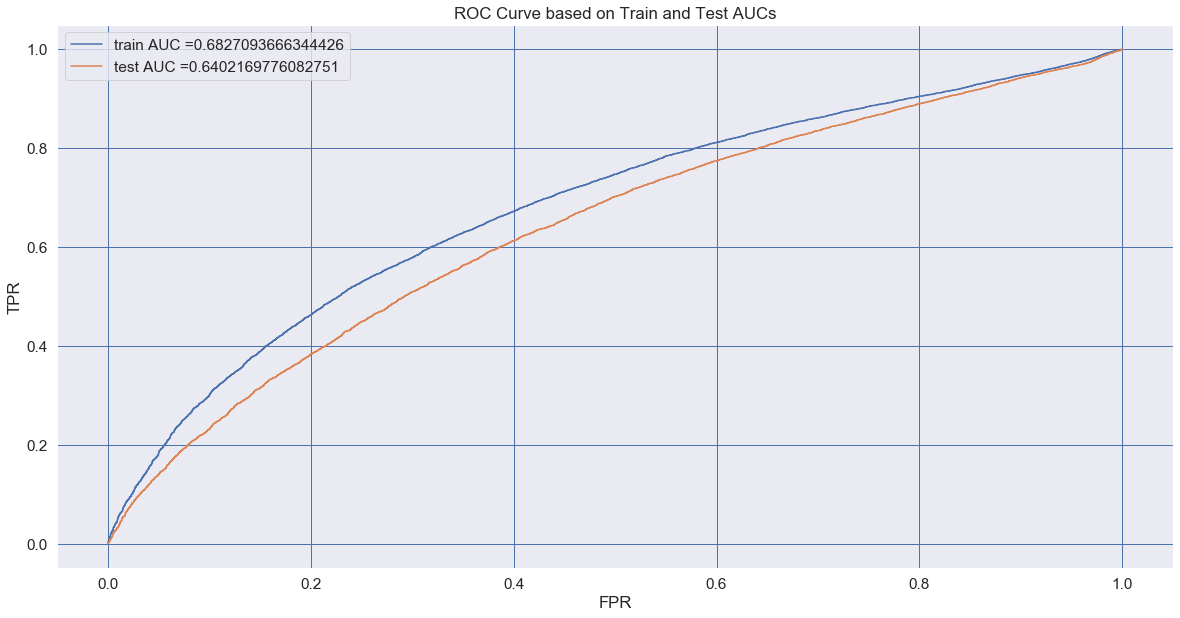

In [75]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [76]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.40937268544779143 for threshold 0.849
Train confusion matrix
[[ 5037  2425]
 [16363 25216]]
Test confusion matrix
[[ 3179  2280]
 [11356 19237]]


Text(0.5, 1, 'Training Confusion Matrix')

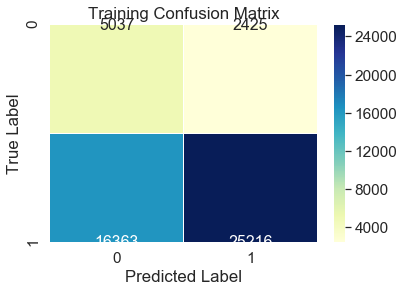

In [77]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

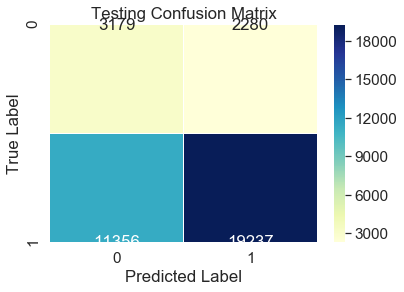

In [78]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

L2 regularizer is better compared with L1 on set 1

In [79]:
# Lets do the same BOW model with GridSearchCV to find best alpha
from sklearn.model_selection import GridSearchCV
sgd_output =SGDClassifier(max_iter=1000, loss="hinge",class_weight='balanced')
parameters = {"alpha":np.arange(10**-4,10**4,5)}
clf = GridSearchCV(sgd_output, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.0000000e-04, 5.0001000e+00, 1.0000100e+01, ..., 9.9850001e+03,
       9.9900001e+03, 9.9950001e+03])},
          

In [80]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('k value with best score: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6278003494197563
k value with best score:  {'alpha': 0.0001}
Train AUC scores
[0.89667429 0.62081632 0.6208046  ... 0.62081481 0.62081481 0.62081481]
CV AUC scores
[0.62780035 0.60034562 0.60033662 ... 0.60034419 0.60034419 0.60034419]


In [81]:
# best alpha appears to be at second point
best_alpha = clf.best_score_

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

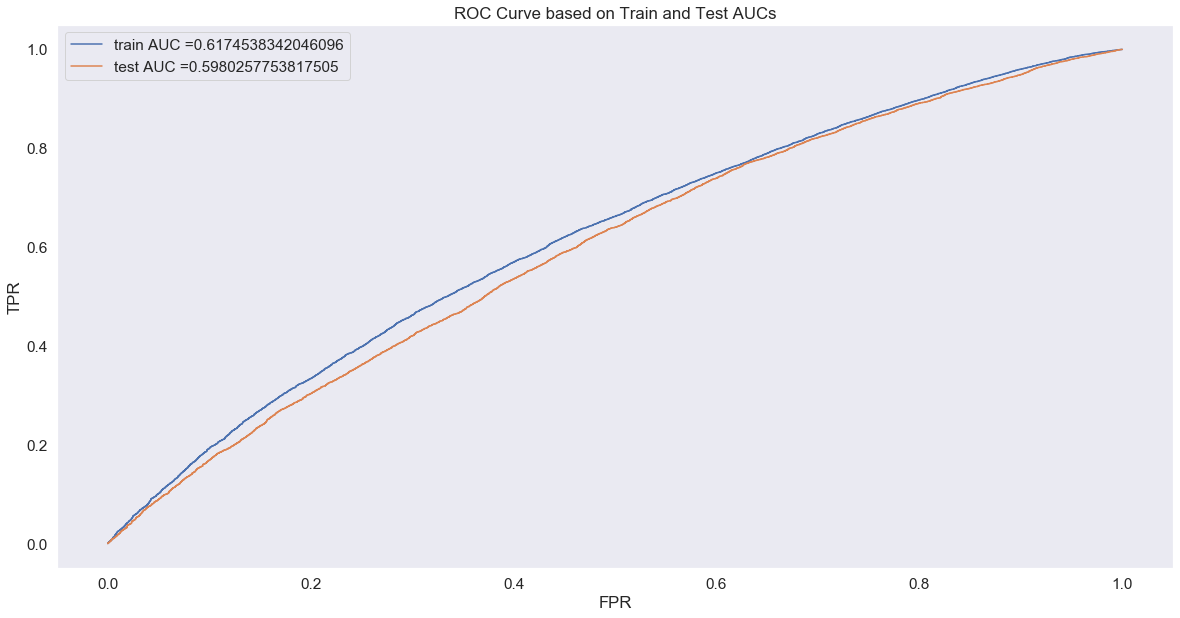

In [82]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

### Set 2 TFIDF 

In [83]:
# Vectroizing Essay and Project_Title in TFIDF Form
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train["essay"].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("Shape of Datamatrix after TFIDF Vectorization")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)
tfidf_essay_feature_names = vectorizer.get_feature_names()

Shape of Datamatrix after TFIDF Vectorization
(49041, 41013) (49041,)
(24155, 41013) (24155,)
(36052, 41013) (36052,)


In [84]:
# Similarly you can vectorize for title also
vectorizer_titles = TfidfVectorizer()
vectorizer_titles.fit(X_train["project_title"])

X_train_pj_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_cv_pj_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_pj_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("Shape of Datamatrix after TFIDF Vectorization")
print(X_train_pj_title_tfidf.shape, y_train.shape)
print(X_cv_pj_title_tfidf.shape, y_cv.shape)
print(X_test_pj_title_tfidf.shape, y_test.shape)
print("="*100)

Shape of Datamatrix after TFIDF Vectorization
(49041, 41013) (49041,)
(24155, 41013) (24155,)
(36052, 41013) (36052,)


In [85]:
# Concatinating all the features for Set 2

X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_price_norm, X_train_category_ohe,
               X_train_subcategory_ohe, X_train_teach_prev_norm, 
               X_train_pj_title_tfidf)).tocsr()

X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, 
               X_cv_grade_ohe, X_cv_category_ohe, X_cv_subcategory_ohe,
               X_cv_price_norm, X_cv_teach_prev_norm, X_cv_pj_title_tfidf)).tocsr()

X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, 
               X_test_grade_ohe, X_test_category_ohe, X_test_subcategory_ohe, 
               X_test_price_norm, X_test_teach_prev_norm,
               X_test_pj_title_tfidf)).tocsr()

In [86]:
# SVM With L2 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:08<00:00,  1.05it/s]


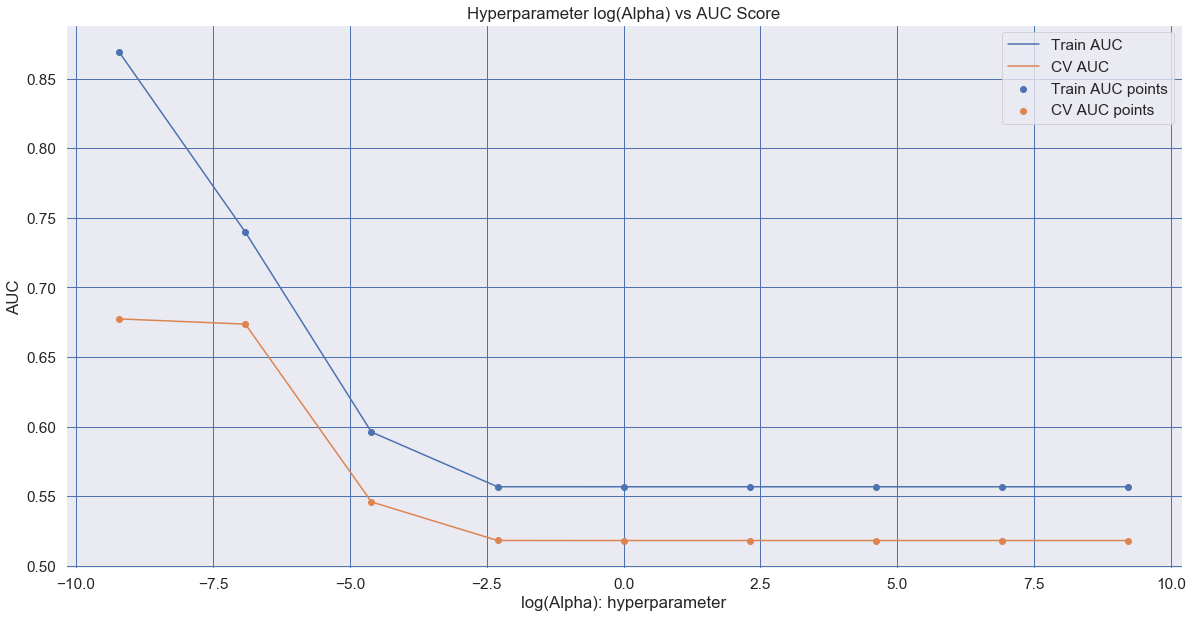

In [87]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [88]:
# best alpha appears to be at second point
best_alpha = 10**-3

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

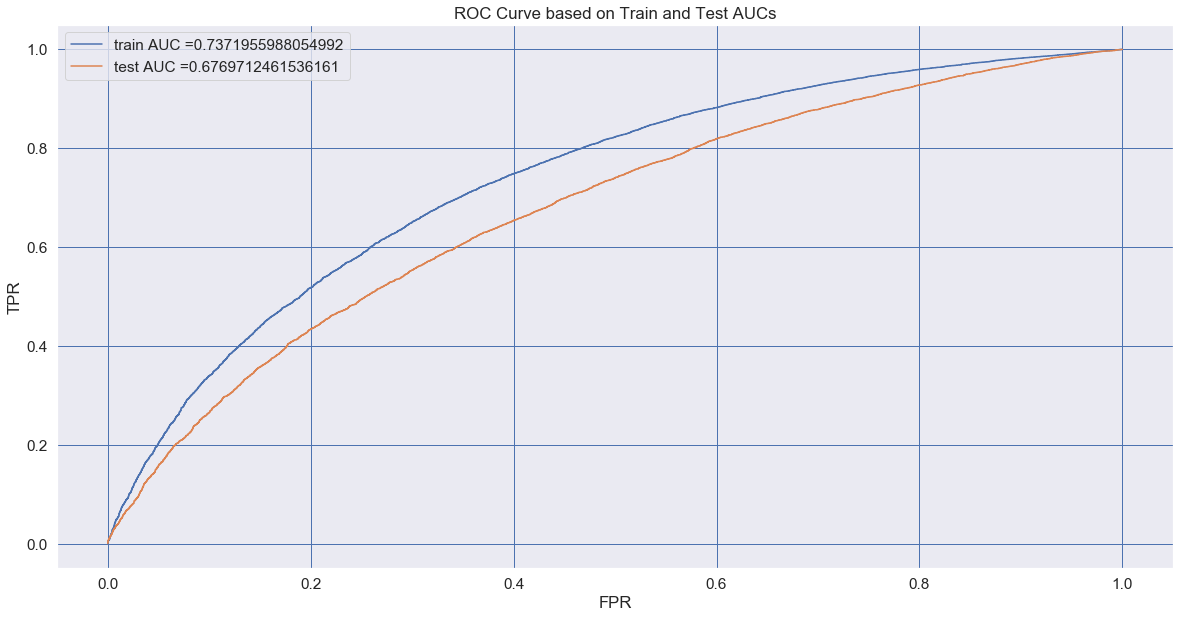

In [89]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [90]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.45911643501303856 for threshold 0.835
Train confusion matrix
[[ 4973  2489]
 [12935 28644]]
Test confusion matrix
[[ 2953  2506]
 [ 8969 21624]]


Text(0.5, 1, 'Training Confusion Matrix')

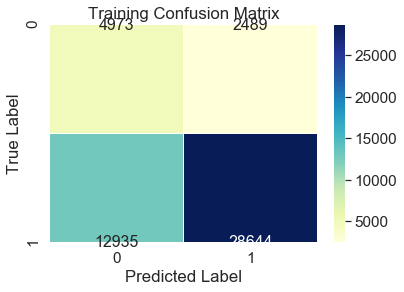

In [91]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

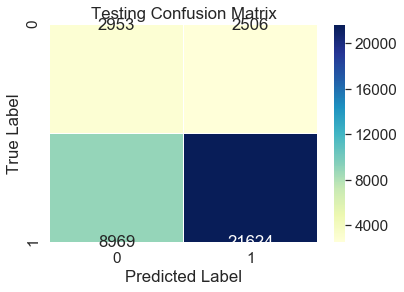

In [92]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [93]:
# SVM With L1 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:13<00:00,  1.52s/it]


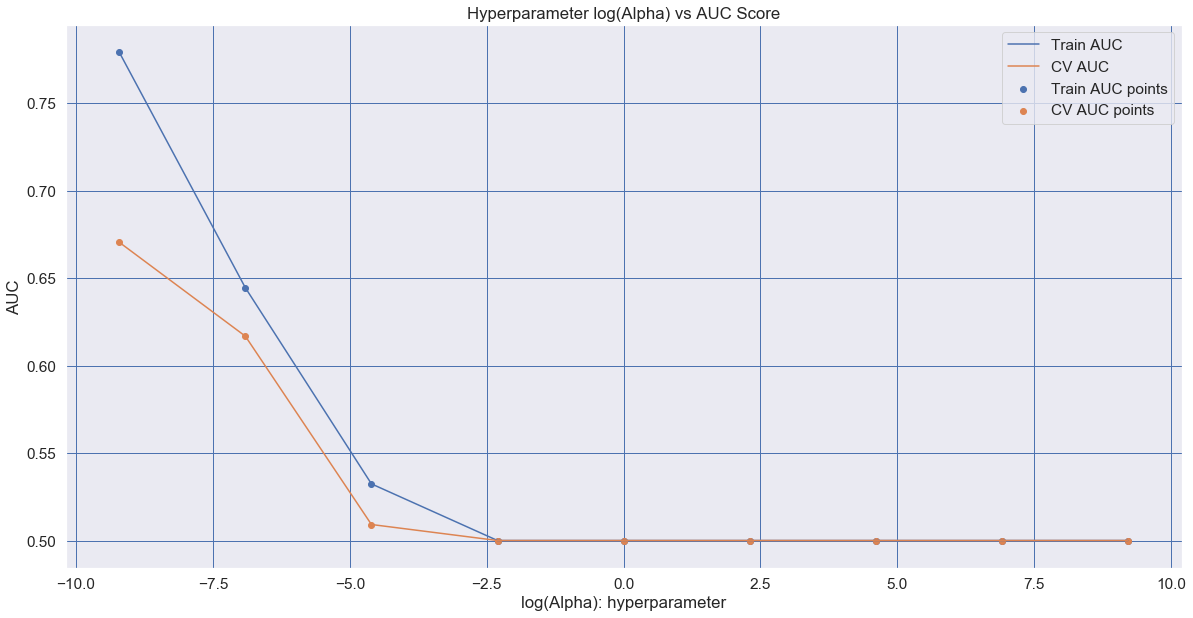

In [94]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [95]:
# best alpha appears to be at first point
best_alpha = 10**-4

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
svm_output_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

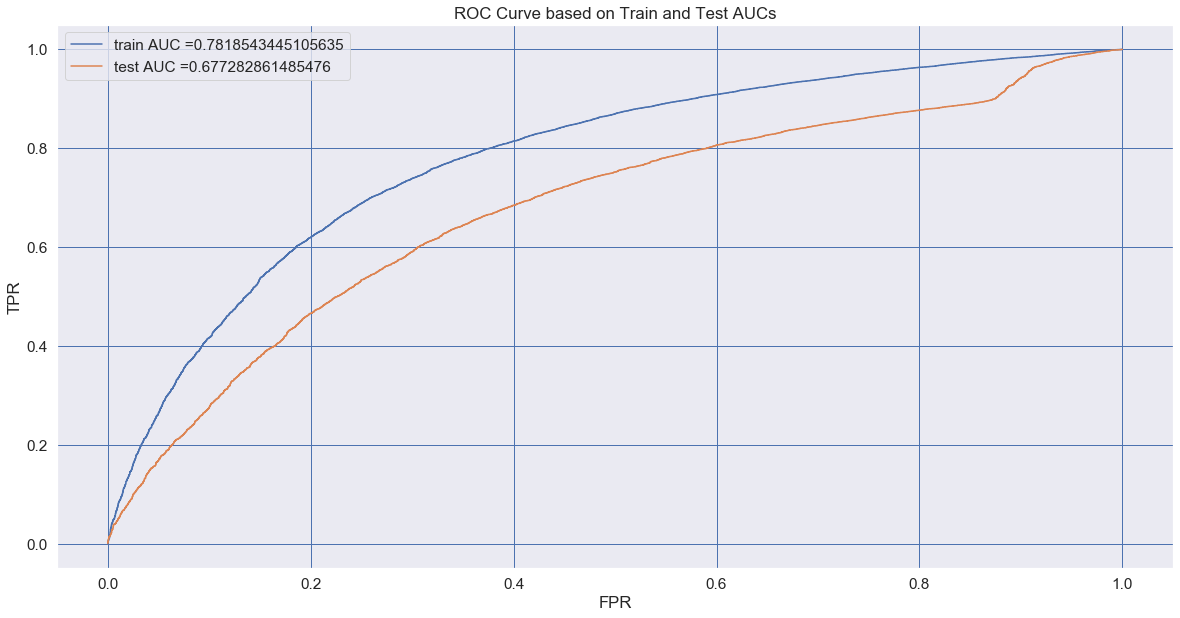

In [96]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [97]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.5190165135587866 for threshold 0.831
Train confusion matrix
[[ 5411  2051]
 [11819 29760]]
Test confusion matrix
[[ 3327  2132]
 [ 9877 20716]]


Text(0.5, 1, 'Training Confusion Matrix')

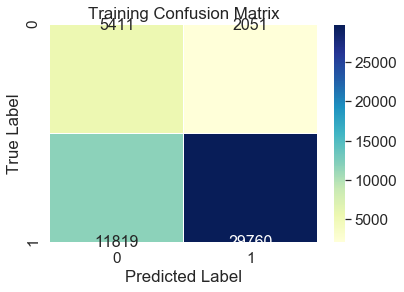

In [98]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

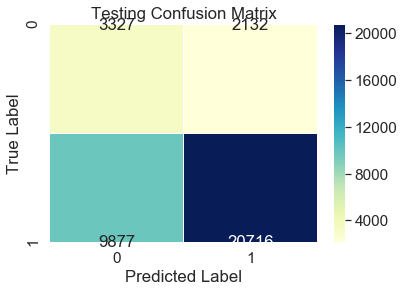

In [99]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

### Set - 3 AvgW2V

In [100]:
# Please write all the code with proper documentation
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [101]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:10<00:00, 4524.49it/s]


49041
300
[ 3.31194164e-02  4.15624208e-02  3.31243881e-02 -1.00119567e-01
 -2.18907761e-02 -2.12810553e-02 -2.94911717e+00  1.42775689e-01
  4.78199365e-02  4.05099195e-02 -3.42107050e-02  1.35214070e-02
  1.63249553e-02 -1.27945182e-01 -7.81456547e-02 -1.86213270e-02
  3.05201220e-02 -1.52514214e-03  5.48681811e-02  1.35741562e-02
  3.10862913e-02 -2.54518453e-02 -3.36852836e-02  3.19574566e-02
 -4.59677286e-02 -5.57952323e-02  1.22484764e-01 -9.18642143e-02
 -1.91273605e-02 -7.72708591e-02 -2.43513601e-01 -6.72001319e-02
  2.97778950e-02  2.22960226e-02 -2.84918553e-02 -2.53407730e-02
 -7.04865767e-02 -6.04069277e-02 -4.43727125e-02 -4.85878717e-02
 -3.72745805e-02  3.42568289e-02  6.57715484e-02 -1.55513331e-01
  2.77018439e-03 -6.53233897e-02  7.07324214e-02 -1.22143762e-02
  3.44679262e-02 -6.00795397e-02 -2.02775931e-02 -3.02068931e-02
  3.04438333e-02 -6.52171780e-02  6.00671509e-03 -4.80679459e-02
  3.30483006e-02  3.82027535e-02 -1.05209552e-01  9.71785519e-02
 -3.36969547e-0

In [102]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:05<00:00, 4344.33it/s]


In [103]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:08<00:00, 4101.25it/s]


In [104]:
# avg w2v for project_titles
avg_w2v_vectors_pj_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_train.append(vector)

print(len(avg_w2v_vectors_pj_title_train))
print(len(avg_w2v_vectors_pj_title_train[0]))
print(avg_w2v_vectors_pj_title_train[0])

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 79824.86it/s]


49041
300
[ 1.47335000e-02  2.40459250e-01  1.26473750e-01  4.01700000e-02
  1.03930000e-01 -1.80428000e-01 -2.41657500e+00 -5.22285000e-01
 -1.10250000e-01 -4.03125000e-02  2.12650000e-01 -5.47485000e-02
  8.09607500e-02 -2.57711250e-01 -1.54774000e-01 -2.46225000e-02
  1.72018250e-01 -3.55000000e-03  1.10305000e-01 -8.21315000e-02
  1.01092500e-01  1.15109750e-01 -3.66892500e-02  3.23512500e-01
  1.44801750e-01 -1.64654800e-01  3.89472500e-01  2.19007500e-01
 -3.35650000e-02 -9.28422500e-02 -2.57100250e-01 -3.05049900e-01
 -2.54185000e-01 -1.25405625e-01 -2.85500000e-02  2.25362500e-01
 -1.45560250e-01  1.80248250e-01 -4.26897500e-01 -1.64338500e-01
 -1.03464650e-01 -1.32022500e-01  2.09199000e-01  2.88287500e-02
 -7.82105000e-02 -1.57390000e-01  9.63125000e-03 -5.57825000e-03
  2.03895000e-02 -7.38483750e-02  1.93367500e-01 -2.30542500e-02
  1.85250000e-01  2.83281500e-01  2.25269750e-01 -6.58400000e-02
  3.66870000e-02  3.97412500e-02 -1.36905000e-01  2.75802500e-01
 -3.54385000e-0

In [105]:
avg_w2v_vectors_pj_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_cv.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 80197.68it/s]


In [106]:
avg_w2v_vectors_pj_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_test.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 78926.61it/s]


In [107]:
X_tr = hstack((avg_w2v_vectors_train, X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_category_ohe,
               X_train_subcategory_ohe, X_train_price_norm,
               X_train_teach_prev_norm, avg_w2v_vectors_pj_title_train)).tocsr()

X_cr = hstack((avg_w2v_vectors_cv, X_cv_state_ohe, X_cv_teacher_ohe, 
               X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe, X_cv_price_norm,
              X_cv_teach_prev_norm, avg_w2v_vectors_pj_title_cv)).tocsr()

X_te = hstack((avg_w2v_vectors_test, X_test_state_ohe, X_test_teacher_ohe, 
               X_test_grade_ohe, X_test_category_ohe,
               X_test_subcategory_ohe, X_test_price_norm, 
              X_test_teach_prev_norm, avg_w2v_vectors_pj_title_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)


In [108]:
# SVM With L2 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:32<00:00,  3.63s/it]


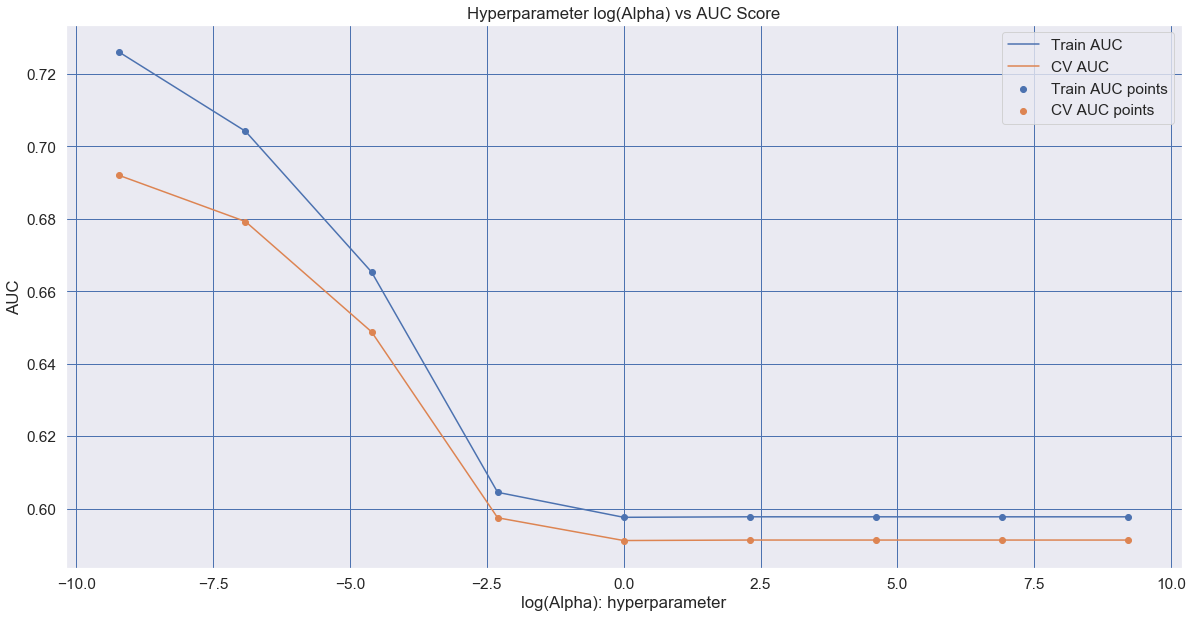

In [109]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [110]:
# best alpha appears to be at first point
best_alpha = 10**-4

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

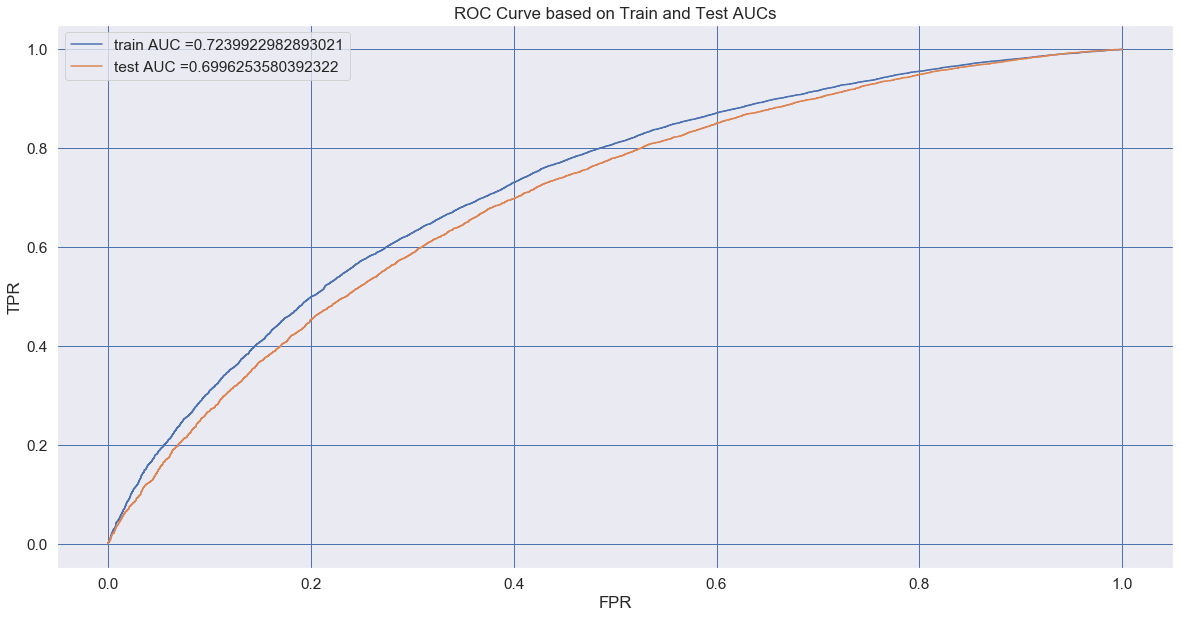

In [111]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [112]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.44375631888324446 for threshold 0.839
Train confusion matrix
[[ 4976  2486]
 [13910 27669]]
Test confusion matrix
[[ 3478  1981]
 [10366 20227]]


Text(0.5, 1, 'Training Confusion Matrix')

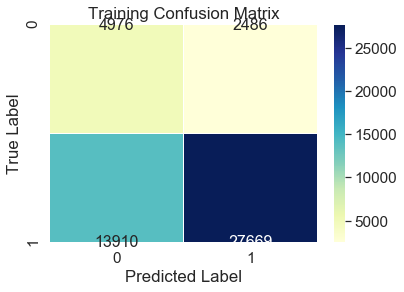

In [113]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

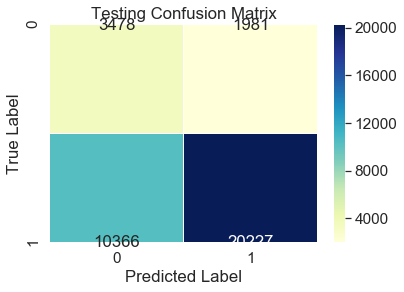

In [114]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [115]:
# SVM With L1 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:21<00:00,  9.01s/it]


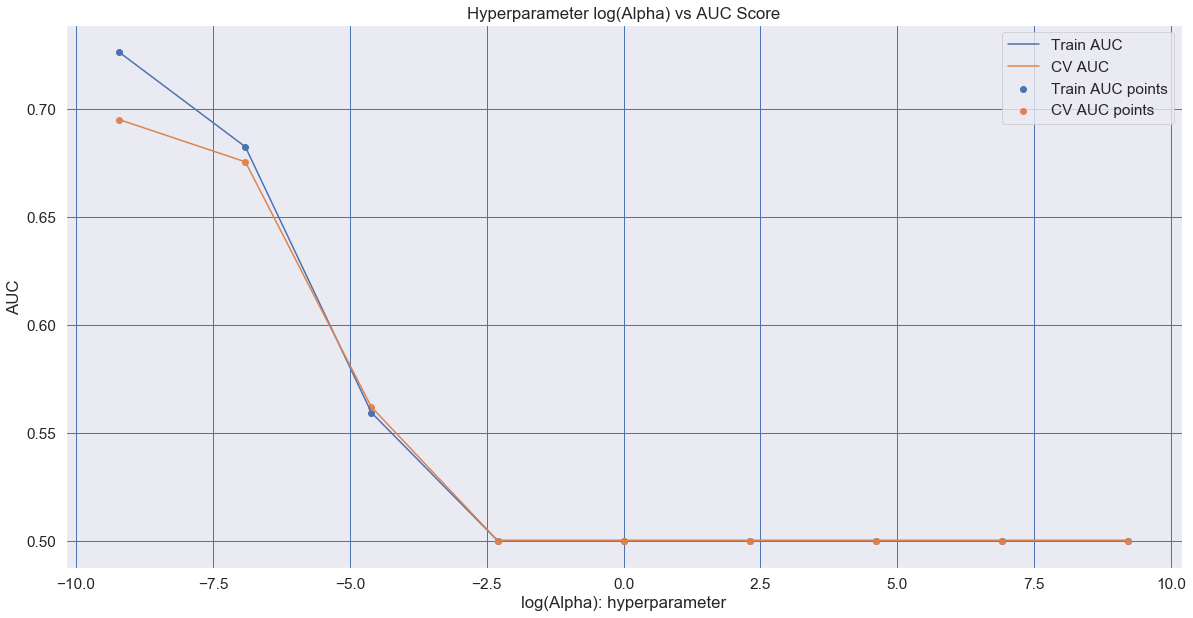

In [116]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [117]:
# best alpha appears to be at first point
best_alpha = 10**-4

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
svm_output_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

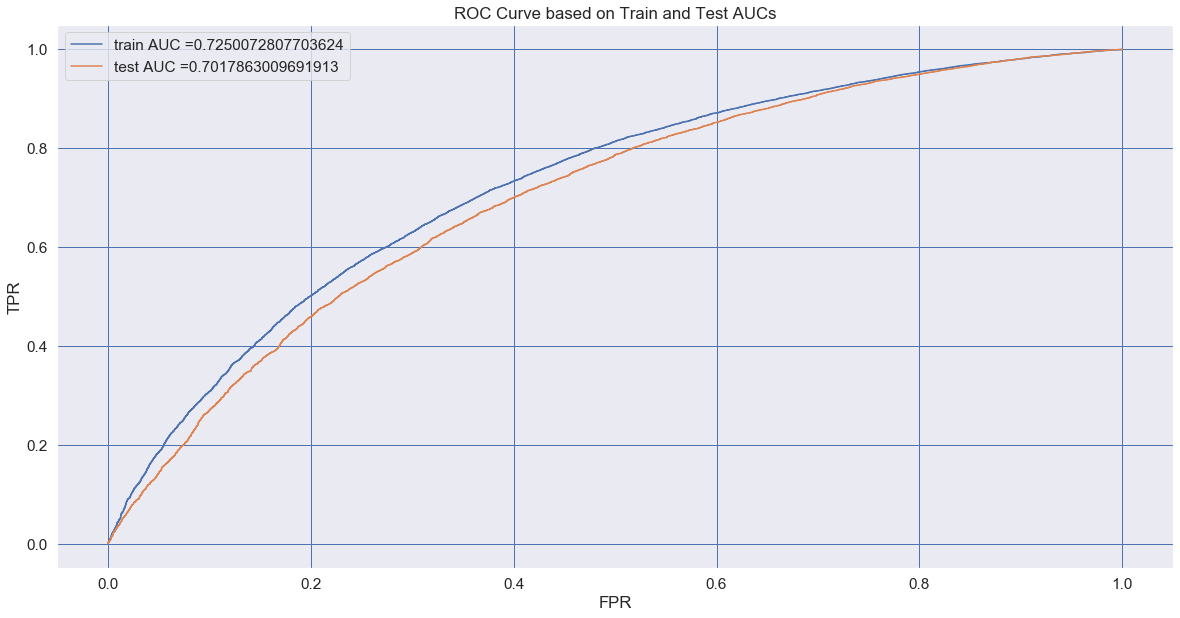

In [118]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

### Set - 4 TFIDF W2V 

In [119]:
# Please write all the code with proper documentation
# preprocessing project_title and essay with TFIDF W2V Vectorization
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [120]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:22<00:00, 593.65it/s]


49041
300


In [121]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:40<00:00, 601.45it/s]


24155
300


In [122]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:00<00:00, 599.27it/s]


36052
300


In [123]:
# preprocessing for Project_title with TFIDF Vectorization
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [124]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_pj_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_pj_title_train.append(vector)

print(len(tfidf_w2v_vectors_pj_title_train))
print(len(tfidf_w2v_vectors_pj_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 38901.29it/s]


49041
300


In [125]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_pj_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_pj_title_cv.append(vector)

print(len(tfidf_w2v_vectors_pj_title_cv))
print(len(tfidf_w2v_vectors_pj_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 39063.91it/s]


24155
300


In [126]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_pj_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_pj_title_test.append(vector)

print(len(tfidf_w2v_vectors_pj_title_test))
print(len(tfidf_w2v_vectors_pj_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 38869.22it/s]


36052
300


In [127]:
# Concatinating all the features
X_tr = hstack((tfidf_w2v_vectors_train, X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_category_ohe,
               X_train_subcategory_ohe, X_train_price_norm,
               X_train_teach_prev_norm, tfidf_w2v_vectors_pj_title_train)).tocsr()

X_cr = hstack((tfidf_w2v_vectors_cv, X_cv_state_ohe, X_cv_teacher_ohe, 
               X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe, X_cv_price_norm,
              X_cv_teach_prev_norm, tfidf_w2v_vectors_pj_title_cv)).tocsr()

X_te = hstack((tfidf_w2v_vectors_test, X_test_state_ohe, X_test_teacher_ohe, 
               X_test_grade_ohe, X_test_category_ohe,
               X_test_subcategory_ohe, X_test_price_norm, 
              X_test_teach_prev_norm, tfidf_w2v_vectors_pj_title_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 701) (49041,)
(24155, 701) (24155,)
(36052, 701) (36052,)


In [128]:
# SVM With L2 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:32<00:00,  3.64s/it]


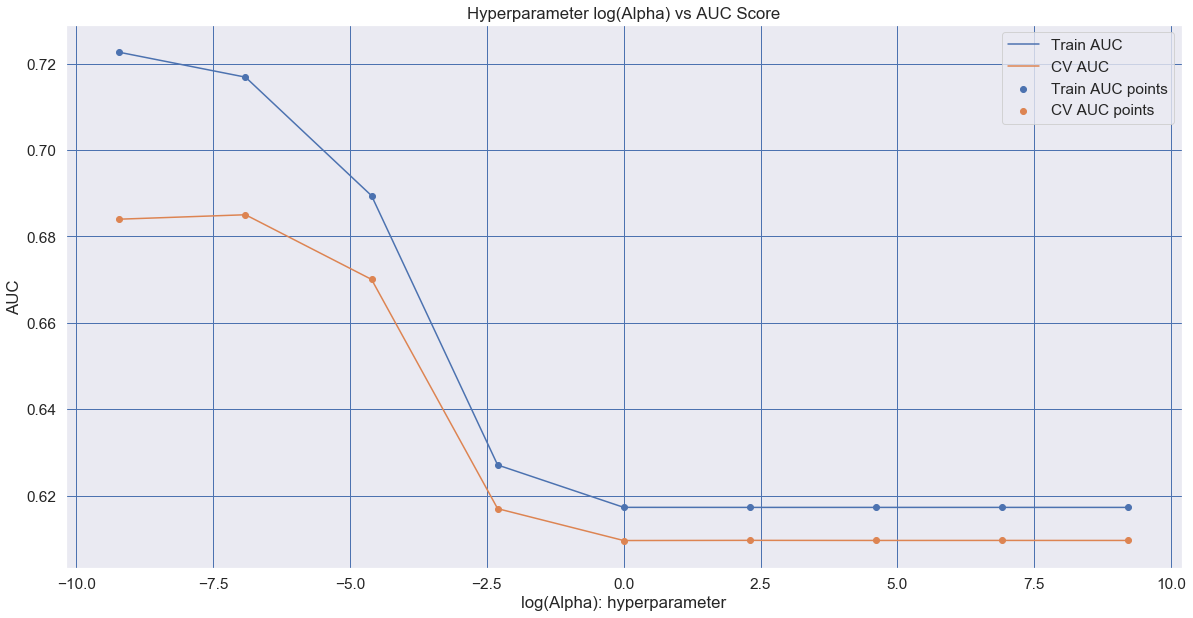

In [129]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [130]:
# best alpha appears to be at second point
best_alpha = 10**-3

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_bow = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=best_alpha)
svm_output_bow = CalibratedClassifierCV(base_estimator_svm_output_bow, cv=3)
svm_output_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_bow.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

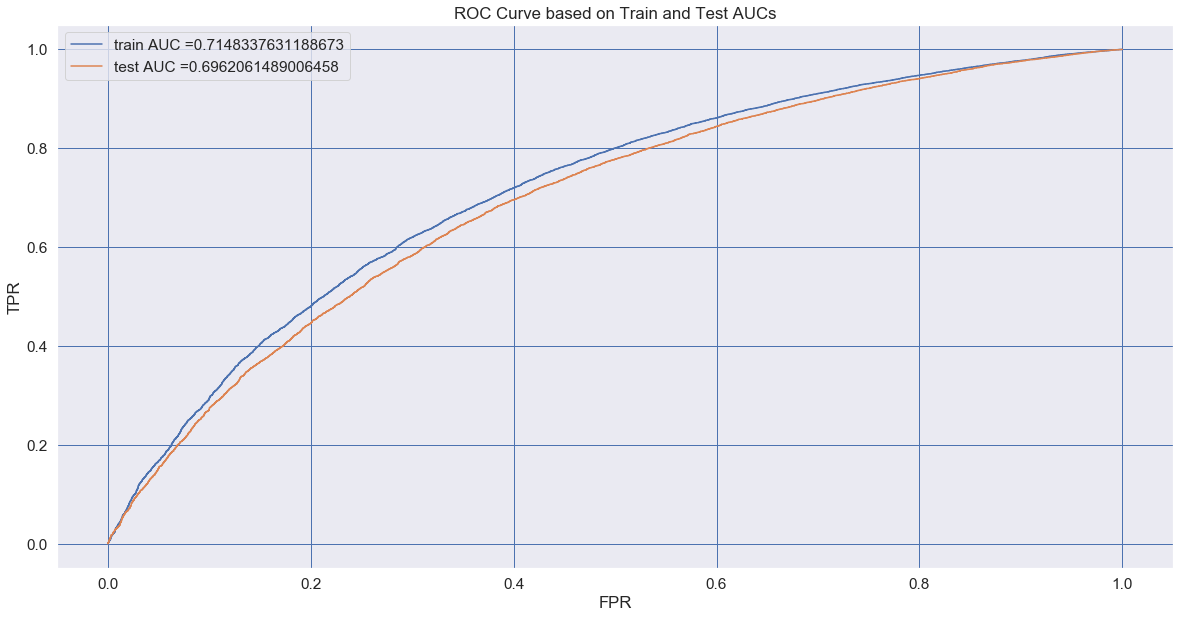

In [131]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [132]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.43766069336552565 for threshold 0.838
Train confusion matrix
[[ 4945  2517]
 [14119 27460]]
Test confusion matrix
[[ 3499  1960]
 [10576 20017]]


Text(0.5, 1, 'Training Confusion Matrix')

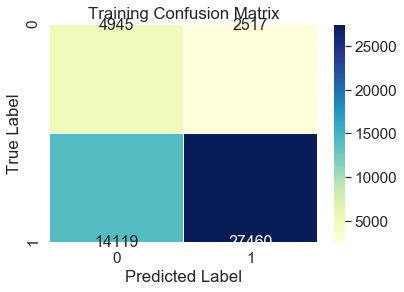

In [133]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

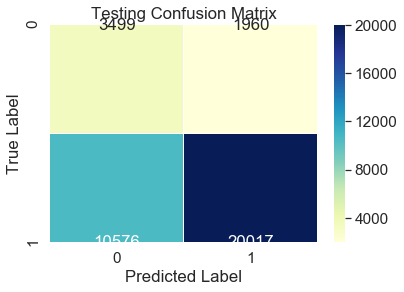

In [134]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [135]:
# SVM With L1 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:08<00:00,  7.57s/it]


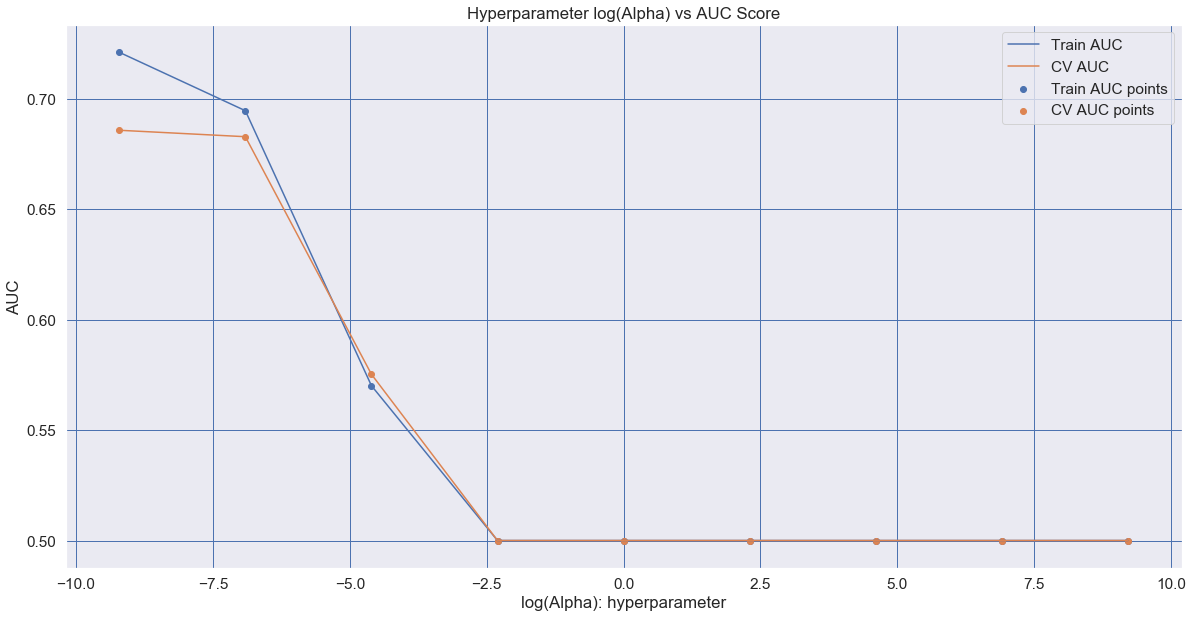

In [136]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [137]:
# best alpha appears to be at second point
best_alpha = 10**-3

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
svm_output_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

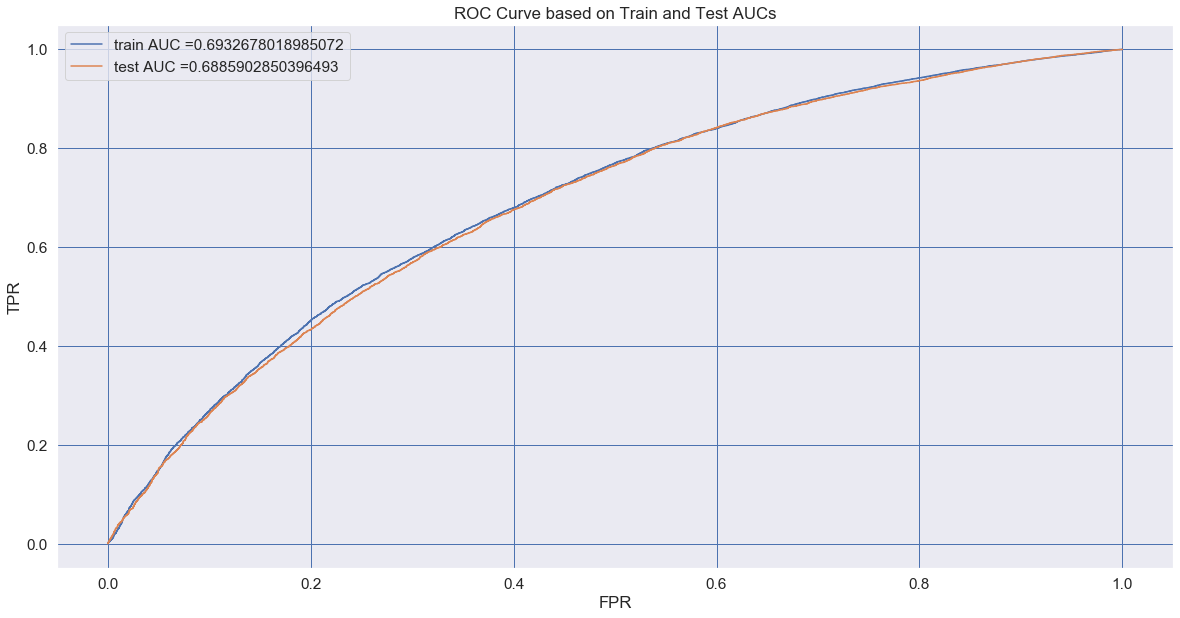

In [138]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [139]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.41140529977941453 for threshold 0.837
Train confusion matrix
[[ 4699  2763]
 [14415 27164]]
Test confusion matrix
[[ 3431  2028]
 [10737 19856]]


Text(0.5, 1, 'Training Confusion Matrix')

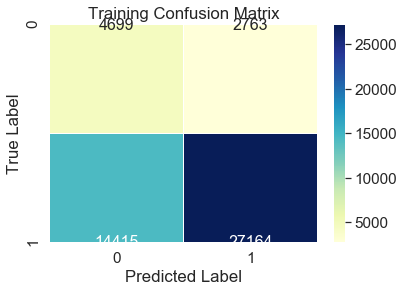

In [140]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

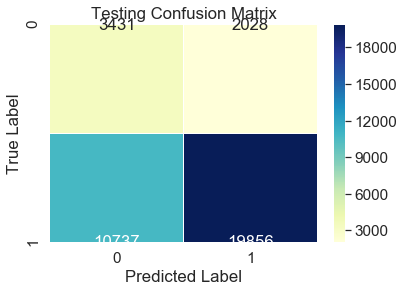

In [141]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [146]:
# Categorical data
print ("School State:", X_train_state_ohe.shape, X_cv_state_ohe.shape, X_test_state_ohe.shape)
print ("Clean Categories:", X_train_category_ohe.shape, X_cv_category_ohe.shape, X_test_category_ohe.shape)
print ("Clean Subcategories:", X_train_subcategory_ohe.shape, X_cv_subcategory_ohe.shape, X_test_subcategory_ohe.shape)
print ("Project Grade:", X_train_grade_ohe.shape, X_cv_grade_ohe.shape, X_test_grade_ohe.shape)
print ("Teacher Prefix:", X_train_teacher_ohe.shape, X_cv_teacher_ohe.shape, X_test_teacher_ohe.shape )

School State: (49041, 51) (24155, 51) (36052, 51)
Clean Categories: (49041, 9) (24155, 9) (36052, 9)
Clean Subcategories: (49041, 30) (24155, 30) (36052, 30)
Project Grade: (49041, 4) (24155, 4) (36052, 4)
Teacher Prefix: (49041, 5) (24155, 5) (36052, 5)


In [148]:
# Normalizing Quantity numerical features
normalizer = Normalizer()
normalizer.fit(X_train["quantity"].values.reshape(1,-1))

Normalizer(copy=True, norm='l2')

In [149]:
X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

In [151]:
X_train_quantity_norm = X_train_quantity_norm.reshape(-1,1)
X_cv_quantity_norm = X_cv_quantity_norm.reshape(-1,1)
X_test_quantity_norm = X_test_quantity_norm.reshape(-1,1)

In [152]:
X.head(1)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs           IN   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades_PreK_2   

                               project_title  \
0  educational support english learners home   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             0  Literacy_Language   

  clean_subcategories                                              essay  \
0        ESL Literacy  my students english learners working english s...   

   price  quantity  
0  154.6        23

In [154]:
X_train["project_title"].head(3)

12073    boys college supplies success
74379              hooked reading nook
72392          everything better color
Name: project_title, dtype: object

In [158]:
def return_pj_title_word_count(_string):
    return len(_string.strip().split(" "))

In [160]:
[return_pj_title_word_count(_str) for _str in X_train["project_title"].head(3)]

[4, 3, 3]

In [161]:
X_train["pj_title_word_count"] = [return_pj_title_word_count(_str) for _str in X_train["project_title"]]
X_cv["pj_title_word_count"] = [return_pj_title_word_count(_str) for _str in X_cv["project_title"]]
X_test["pj_title_word_count"] = [return_pj_title_word_count(_str) for _str in X_test["project_title"]]

In [162]:
print (X_train["project_title"].head(10),X_train["pj_title_word_count"].head(10))

12073                        boys college supplies success
74379                                  hooked reading nook
72392                              everything better color
14190                                techno tablet kinders
39698                    have seat take load off your feet
98687                                  creating future now
36950                            think outside the toy box
54947                                     class technology
21252                            a table full fun learning
53448    sensory opportunities young students center ba...
Name: project_title, dtype: object 12073    4
74379    3
72392    3
14190    3
39698    7
98687    3
36950    5
54947    2
21252    5
53448    7
Name: pj_title_word_count, dtype: int64


In [197]:
normalizer = Normalizer()
normalizer.fit(X_train["pj_title_word_count"].values.reshape(1,-1))
X_train_pj_words_norm = normalizer.transform(X_train['pj_title_word_count'].values.reshape(1,-1))
X_cv_pj_words_norm = normalizer.transform(X_cv['pj_title_word_count'].values.reshape(1,-1))
X_test_pj_words_norm = normalizer.transform(X_test['pj_title_word_count'].values.reshape(1,-1))
X_train_pj_words_norm = X_train_pj_words_norm.reshape(-1,1)
X_cv_pj_words_norm = X_cv_pj_words_norm.reshape(-1,1)
X_test_pj_words_norm = X_test_pj_words_norm.reshape(-1,1)

In [163]:
X_train["essay_word_count"] = [return_pj_title_word_count(_str) for _str in X_train["essay"]]
X_cv["essay_word_count"] = [return_pj_title_word_count(_str) for _str in X_cv["essay"]]
X_test["essay_word_count"] = [return_pj_title_word_count(_str) for _str in X_test["essay"]]

In [198]:
normalizer = Normalizer()
normalizer.fit(X_train["essay_word_count"].values.reshape(1,-1))
X_train_essay_words_norm = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
X_cv_essay_norm = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
X_test_essay_norm = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))
X_train_essay_words_norm = X_train_essay_words_norm.reshape(-1,1)
X_cv_essay_norm = X_cv_essay_norm.reshape(-1,1)
X_test_essay_norm = X_test_essay_norm.reshape(-1,1)

In [166]:
 sid = SentimentIntensityAnalyzer()

In [165]:
print(ss)

{'neg': 0.01, 'neu': 0.745, 'pos': 0.245, 'compound': 0.9975}


In [191]:
train_ss={"neg":[],"neu":[],"pos":[],"compound":[]}
cv_ss = {"neg":[],"neu":[],"pos":[],"compound":[]}
test_ss = {"neg":[],"neu":[],"pos":[],"compound":[]}

In [192]:
for _essay in tqdm(X_train["essay"].values):
    ss= sid.polarity_scores(_essay)
    for key, value in ss.items():
        train_ss[key].extend([str(value)])
X_train["essay_scores_neg"] = train_ss["neg"]
X_train["essay_scores_neu"] = train_ss["neu"]
X_train["essay_scores_pos"] = train_ss["pos"]
X_train["essay_scores_com"] = train_ss["compound"]

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:09<00:00, 700.97it/s]


<h1>3. Conclusion</h1>

In [194]:
for _essay in tqdm(X_cv["essay"].values):
    ss= sid.polarity_scores(_essay)
    for key, value in ss.items():
        cv_ss[key].extend([str(value)])
X_cv["essay_scores_neg"] = cv_ss["neg"]
X_cv["essay_scores_neu"] = cv_ss["neu"]
X_cv["essay_scores_pos"] = cv_ss["pos"]
X_cv["essay_scores_com"] = cv_ss["compound"]

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:35<00:00, 674.30it/s]


In [195]:
for _essay in tqdm(X_test["essay"].values):
    ss= sid.polarity_scores(_essay)
    for key, value in ss.items():
        test_ss[key].extend([str(value)])
X_test["essay_scores_neg"] = test_ss["neg"]
X_test["essay_scores_neu"] = test_ss["neu"]
X_test["essay_scores_pos"] = test_ss["pos"]
X_test["essay_scores_com"] = test_ss["compound"]

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:52<00:00, 689.16it/s]


In [199]:
normalizer = Normalizer()
normalizer.fit(X_train["essay_scores_neg"].values.reshape(1,-1))
X_train_ess_neg_norm = normalizer.transform(X_train['essay_scores_neg'].values.reshape(1,-1))
X_cv_ess_neg_norm = normalizer.transform(X_cv['essay_scores_neg'].values.reshape(1,-1))
X_test_ess_neg_norm = normalizer.transform(X_test['essay_scores_neg'].values.reshape(1,-1))
X_train_ess_neg_norm = X_train_ess_neg_norm.reshape(-1,1)
X_cv_ess_neg_norm = X_cv_ess_neg_norm.reshape(-1,1)
X_test_ess_neg_norm = X_test_ess_neg_norm.reshape(-1,1)

In [200]:
normalizer = Normalizer()
normalizer.fit(X_train["essay_scores_neu"].values.reshape(1,-1))
X_train_ess_neu_norm = normalizer.transform(X_train['essay_scores_neu'].values.reshape(1,-1))
X_cv_ess_neu_norm = normalizer.transform(X_cv['essay_scores_neu'].values.reshape(1,-1))
X_test_ess_neu_norm = normalizer.transform(X_test['essay_scores_neu'].values.reshape(1,-1))
X_train_ess_neu_norm = X_train_ess_neu_norm.reshape(-1,1)
X_cv_ess_neu_norm = X_cv_ess_neu_norm.reshape(-1,1)
X_test_ess_neu_norm = X_test_ess_neu_norm.reshape(-1,1)

In [201]:
normalizer = Normalizer()
normalizer.fit(X_train["essay_scores_pos"].values.reshape(1,-1))
X_train_ess_pos_norm = normalizer.transform(X_train['essay_scores_pos'].values.reshape(1,-1))
X_cv_ess_pos_norm = normalizer.transform(X_cv['essay_scores_pos'].values.reshape(1,-1))
X_test_ess_pos_norm = normalizer.transform(X_test['essay_scores_pos'].values.reshape(1,-1))
X_train_ess_pos_norm = X_train_ess_pos_norm.reshape(-1,1)
X_cv_ess_pos_norm = X_cv_ess_pos_norm.reshape(-1,1)
X_test_ess_pos_norm = X_test_ess_pos_norm.reshape(-1,1)

In [202]:
normalizer = Normalizer()
normalizer.fit(X_train["essay_scores_com"].values.reshape(1,-1))
X_train_ess_com_norm = normalizer.transform(X_train['essay_scores_com'].values.reshape(1,-1))
X_cv_ess_com_norm = normalizer.transform(X_cv['essay_scores_com'].values.reshape(1,-1))
X_test_ess_com_norm = normalizer.transform(X_test['essay_scores_com'].values.reshape(1,-1))
X_train_ess_com_norm = X_train_ess_com_norm.reshape(-1,1)
X_cv_ess_com_norm = X_cv_ess_com_norm.reshape(-1,1)
X_test_ess_com_norm = X_test_ess_com_norm.reshape(-1,1)

In [203]:
# numeric data
print ("quantity: ", X_train_quantity_norm.shape, X_cv_quantity_norm.shape, X_test_quantity_norm.shape)
print ("pj title word count: ", X_train_pj_words_norm.shape, X_cv_pj_words_norm.shape, X_test_pj_words_norm.shape)
print ("essay word count: ", X_train_essay_words_norm.shape, X_cv_essay_norm.shape, X_test_essay_norm.shape)
print ("neg: ", X_train_ess_neg_norm.shape, X_cv_ess_neg_norm.shape, X_test_ess_neg_norm.shape)
print ("neu: ", X_train_ess_neu_norm.shape, X_cv_ess_neu_norm.shape, X_test_ess_neu_norm.shape)
print ("pos: ", X_train_ess_pos_norm.shape, X_cv_ess_pos_norm.shape, X_test_ess_pos_norm.shape)
print ("com: ", X_train_ess_com_norm.shape, X_cv_ess_com_norm.shape, X_test_ess_com_norm.shape)
print ("teacher previous: ", X_train_teach_prev_norm.shape, X_cv_teach_prev_norm.shape, X_test_teach_prev_norm.shape)
print ("price: ", X_train_price_norm.shape, X_cv_price_norm.shape, X_test_price_norm.shape)

quantity:  (49041, 1) (24155, 1) (36052, 1)
pj title word count:  (49041, 1) (24155, 1) (36052, 1)
essay word count:  (49041, 1) (24155, 1) (36052, 1)
neg:  (49041, 1) (24155, 1) (36052, 1)
neu:  (49041, 1) (24155, 1) (36052, 1)
pos:  (49041, 1) (24155, 1) (36052, 1)
com:  (49041, 1) (24155, 1) (36052, 1)
teacher previous:  (49041, 1) (24155, 1) (36052, 1)
price:  (49041, 1) (24155, 1) (36052, 1)


In [207]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

In [209]:
# applying trucated SVD over n number of values to find best number of components
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
_n_comps = [2,5,10,25,50,100,150,250,500,1000,2000,2500]
_varience_sum = []
for i in tqdm(_n_comps):
    svd = TruncatedSVD(n_components = i,random_state=42)
    svd.fit(X_train_essay_tfidf)
    _varience_sum.append(svd.explained_variance_ratio_.sum())

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [07:23<00:00, 36.93s/it]


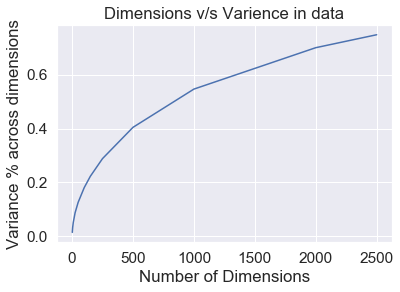

In [210]:
plt.xlabel("Number of Dimensions")
plt.ylabel("Variance % across dimensions")
plt.title("Dimensions v/s Varience in data")
plt.plot(_n_comps, _varience_sum)
plt.show()

In [212]:
# Lets add 5000 also to number of components
_n_comps2 = [5000,10000,15000]
_varience_sum2 = []
for i in tqdm(_n_comps2):
    svd = TruncatedSVD(n_components = i,random_state=42)
    svd.fit(X_train_essay_tfidf)
    _varience_sum2.append(svd.explained_variance_ratio_.sum())

100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [1:34:24<00:00, 1888.01s/it]


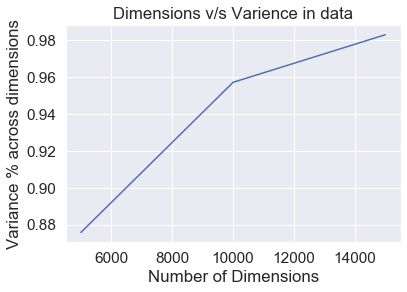

In [214]:
plt.xlabel("Number of Dimensions")
plt.ylabel("Variance % across dimensions")
plt.title("Dimensions v/s Varience in data")
plt.plot(_n_comps2, _varience_sum2)
plt.show()

### I observe that out of 40 thousand features 98% varience is maintained by 14000 components and over 90% varience by 5000 components 

In [215]:
# concatenating all data
X_tr = hstack((X_train_quantity_norm, X_train_pj_words_norm, X_train_essay_words_norm,
             X_train_ess_neg_norm, X_train_ess_neu_norm, X_train_ess_pos_norm,
             X_train_ess_com_norm, X_train_teach_prev_norm, X_train_price_norm,
             X_train_state_ohe, X_train_category_ohe, X_train_subcategory_ohe,
             X_train_grade_ohe, X_train_teacher_ohe)).tocsr()


X_cr = hstack((X_cv_quantity_norm, X_cv_pj_words_norm, X_cv_essay_norm,
             X_cv_ess_neg_norm, X_cv_ess_neu_norm, X_cv_ess_pos_norm,
             X_cv_ess_com_norm, X_cv_teach_prev_norm, X_cv_price_norm,
             X_cv_state_ohe, X_cv_category_ohe, X_cv_subcategory_ohe,
             X_cv_grade_ohe, X_cv_teacher_ohe)).tocsr()


X_te = hstack((X_test_quantity_norm, X_test_pj_words_norm, X_test_essay_norm,
             X_test_ess_neg_norm, X_test_ess_neu_norm, X_test_ess_pos_norm,
             X_test_ess_com_norm, X_test_teach_prev_norm, X_test_price_norm,
             X_test_state_ohe, X_test_category_ohe, X_test_subcategory_ohe,
             X_test_grade_ohe, X_test_teacher_ohe)).tocsr()

In [216]:
# set - 5
# SVM With L1 Penality
# L2 regulaization is default penality

# L1 Regularization - Lasso
# L2 Regularization - Ridge
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.45it/s]


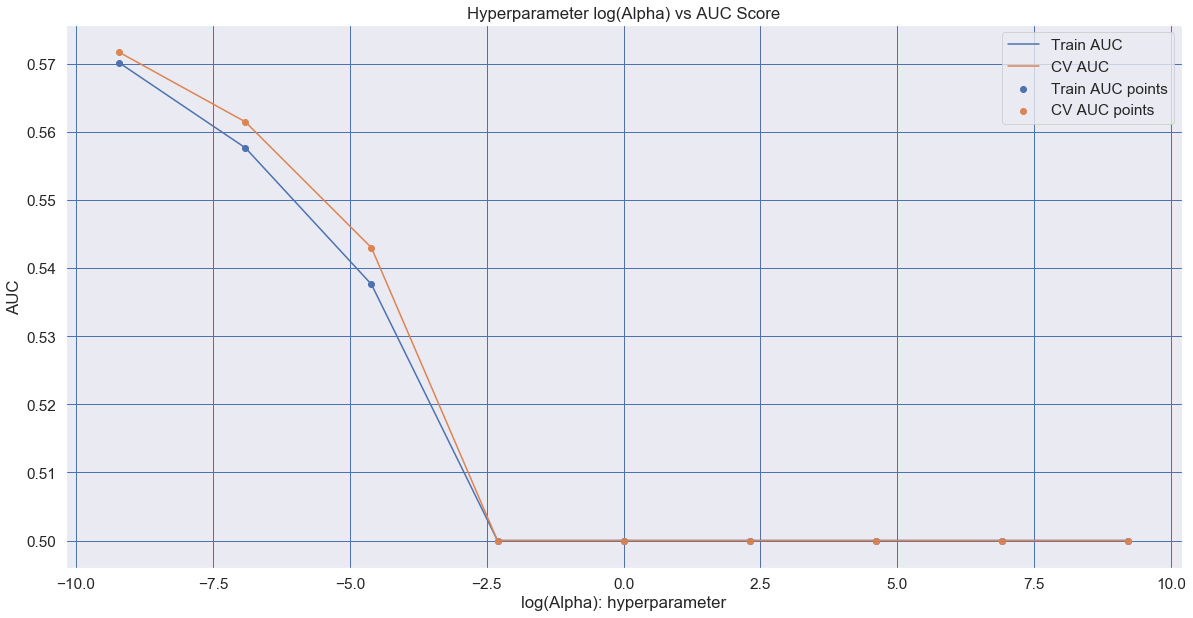

In [217]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [218]:
# best alpha appears to be at first point
best_alpha = 10**-4

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
svm_output_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

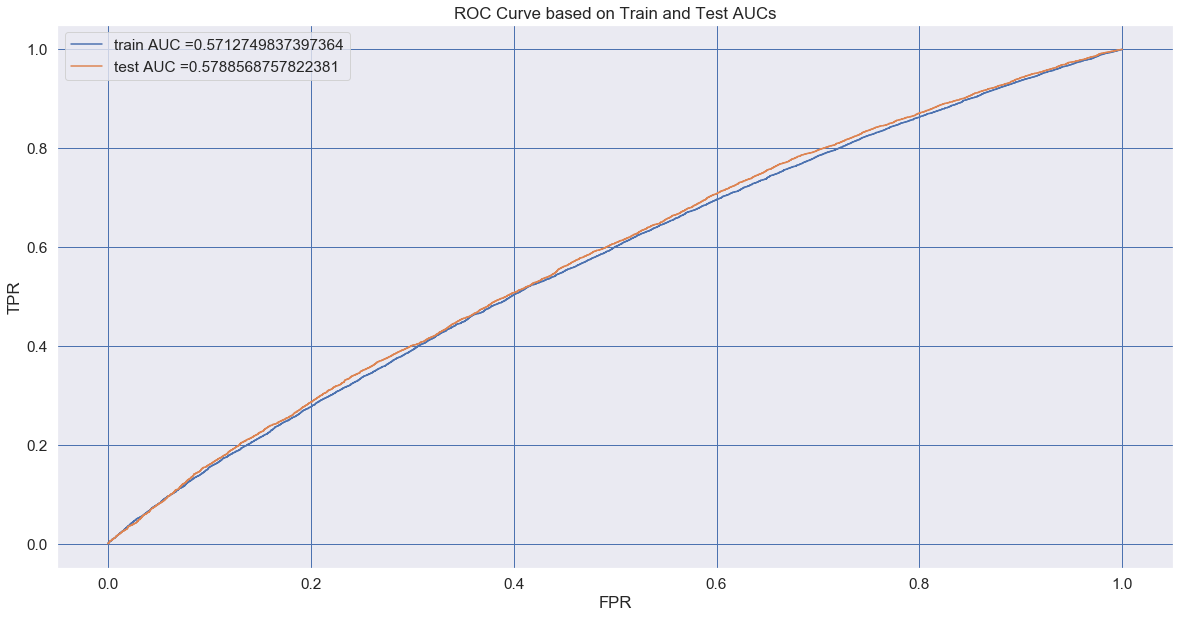

In [219]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [220]:
# with L2 Regularization for set 5
train_auc = []
cv_auc = []
alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
for i in tqdm(alpha):
    base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l2', class_weight='balanced', alpha=i)
    # Since SGDClassifier with Hinge loss doesn't have a predict_porba function lets consider this
    # as a base estimator and have a CalibrateClassiferCV on top of this
    svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
    svm_output_tfidf.fit(X_tr, y_train)

    y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1] # Returning the probablity score of greater class label
    y_cv_pred = svm_output_tfidf.predict_proba(X_cr)[:,1]

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.59it/s]


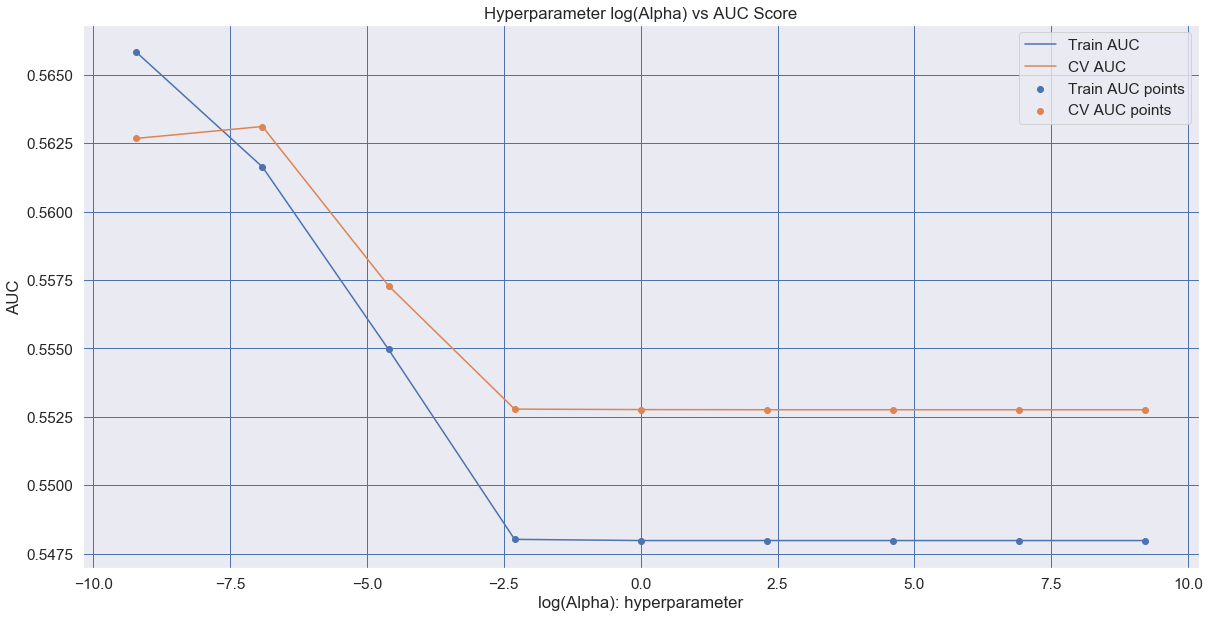

In [221]:
log_alphas = [log(alph) for alph in alpha]
plt.figure(figsize=(20,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter log(Alpha) vs AUC Score")
plt.grid(b=True, color="b")
plt.show()

In [222]:
# best alpha appears to be at second point
best_alpha = 10**-3

from sklearn.metrics import roc_curve, auc


base_estimator_svm_output_tfidf = SGDClassifier(loss="hinge", penalty='l1', class_weight='balanced', alpha=best_alpha)
svm_output_tfidf = CalibratedClassifierCV(base_estimator_svm_output_tfidf, cv=3)
svm_output_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm_output_tfidf.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = svm_output_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

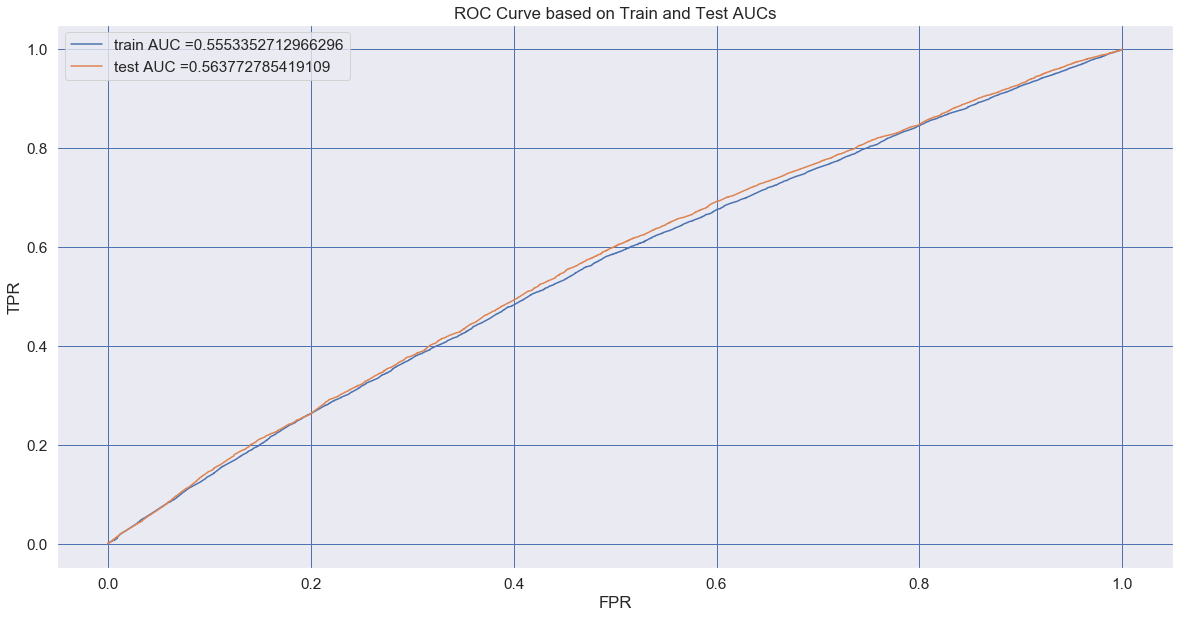

In [223]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid(b=True, color='b')
plt.show()

In [224]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)


the maximum value of tpr*(1-fpr) 0.2961233168437908 for threshold 0.848
Train confusion matrix
[[ 3960  3502]
 [18378 23201]]
Test confusion matrix
[[ 2920  2539]
 [13268 17325]]


Text(0.5, 1, 'Training Confusion Matrix')

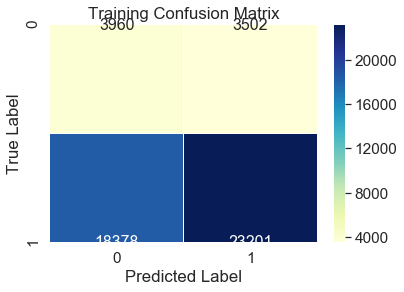

In [225]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

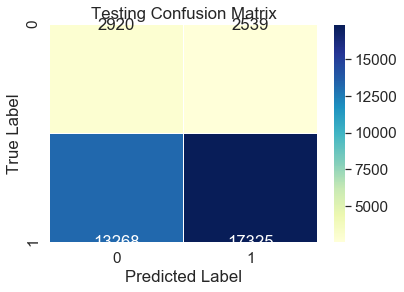

In [226]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

The AUC of set 5 clearly shows the model is dumb without any text features such as pj title or essay.

# Summary

In [227]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Regularization", "Hyperparameter (alpha)", "Train AUC", "Test AUC"]

x.add_row(["BOW","L2",0.01,0.767,0.678])
x.add_row(["BOW","L1",0.001,0.682,0.64])
x.add_row(["TFIDF","L1",0.0001,0.781,0.677])
x.add_row(["TFIDF","L2",0.001,0.737,0.676])
x.add_row(["W2V","L1",0.0001,0.725,0.701])
x.add_row(["W2V","L2",0.0001,0.723,0.699])
x.add_row(["TFIDF W2V","L1",0.001,0.693,0.688])
x.add_row(["TFIDF W2V","L2",0.001,0.714,0.696])
x.add_row(["Dumb Model", "L1", 0.0001, 0.571, 0.578])
x.add_row(["Dumb Model", "L2", 0.001, 0.555, 0.563])
print(x)

+------------+----------------+------------------------+-----------+----------+
| Vectorizer | Regularization | Hyperparameter (alpha) | Train AUC | Test AUC |
+------------+----------------+------------------------+-----------+----------+
|    BOW     |       L2       |          0.01          |   0.767   |  0.678   |
|    BOW     |       L1       |         0.001          |   0.682   |   0.64   |
|   TFIDF    |       L1       |         0.0001         |   0.781   |  0.677   |
|   TFIDF    |       L2       |         0.001          |   0.737   |  0.676   |
|    W2V     |       L1       |         0.0001         |   0.725   |  0.701   |
|    W2V     |       L2       |         0.0001         |   0.723   |  0.699   |
| TFIDF W2V  |       L1       |         0.001          |   0.693   |  0.688   |
| TFIDF W2V  |       L2       |         0.001          |   0.714   |  0.696   |
| Dumb Model |       L1       |         0.0001         |   0.571   |  0.578   |
| Dumb Model |       L2       |         